$
\newcommand{\xbf}{{\bf x}}
\newcommand{\ybf}{{\bf y}}
\newcommand{\wbf}{{\bf w}}
\newcommand{\Ibf}{\mathbf{I}}
\newcommand{\Xbf}{\mathbf{X}}
\newcommand{\Rbb}{\mathbb{R}}
$

# Introduction aux réseaux de neurones 
Matériel de cours rédigé par Pascal Germain, 2018
************

# Introduction to Neural Networks
Traduction and adaptation by Serge Iovleff, 2022
************

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import aidecours
from aidecours import code_button as CB
aidecours.center_images(); CB()

# Hide this neuron that I cannot see

An *artificial neural network* is just a simple *computational graph*, which expresses a (possibly) complex function as a succession of simple operations.



Let's start by looking at a very simple neural network, with two input neurons and one output neuron. This network represents a function $R_\wbf: \Rbb^2 \to \Rbb$, which we illustrate as follows:
<p>
<center><img src="images/reseau_simple_.png"/></center>


The network $R_\wbf$ above receives two input values: $x_1$ and $x_2$. These values are respectively multiplied by the weights $w_1$ and $w_2$. The right neuron receives the values $w_1 x_1$ and $w_2 x_2$, and combines them by applying the function $f$. The obtained value corresponds to the output of the network. 

$$R_\wbf\left( \small\begin{bmatrix} x_1\\ x_2 \end{bmatrix} \right) = f(w_1 x_1+w_2 x_2)\,.$$

## Regression: The linear neuron

For example, if $f$ is the identity function $f(x)=x$, this network represents the operation:
$$R_\wbf\left( \small\begin{bmatrix} x_1\\ x_2 \end{bmatrix}\right) = f(w_1 x_1 +  w_2 x_2) = w_1 x_1 + w_2 x_2\,.$$

We have here a neural network in its simplest expression, representing a scalar product between a vector $\xbf = (x_1,x_2)$ and a vector $\wbf = (w_1,w_2)$:
$$R_\wbf({\xbf}) = \wbf\cdot \xbf\,.$$

In reality, a neural network will usually have more than 2 inputs. We will note $d$ the dimension of the input space of the network (the number of input neurons). So we have $\xbf\in\Rbb^d$ and $\wbf\in\Rbb^d$.

$$R_\wbf({\xbf}) = \sum_{i=1}^d w_i x_i = \wbf\cdot \xbf\,.$$

<center><img src="images/reseau_simple_d.png" style="height: 200px;"/></center>

### Training the network

Typically, the training of a neural network will consist in presenting the network with a training set in order to "learn" the weights ${\bf w}$. 

This **training set** will be noted $S$ and will contain $n$ observations,

$$S = ({\bf x}_1, y_1), ({\bf x}_2, y_2), ({\bf x}_n, y_n), $$

where an *observation* is an input-output pair $({\bf x}, y)$.



### Loss function

In order to guide the learning process, we need to choose a loss function $L\big(y',y\big)$. The learning process will then consist in solving the following problem:

$$\min_\wbf \left[\frac1n \sum_{i=1}^n L\Big(R_\wbf(\xbf_i), y_i\Big)\right].$$ 

### Quadratic loss

Let's take the example of the quadratic loss:

$$L_{\rm quad}\big(y', y\big) = (y'-y)^2\,.$$

Here, we note $y'$ the label predicted by the neural network and $y$ the true label of an observation $\xbf$.

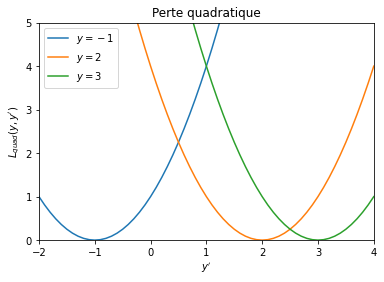

In [2]:
def perte_quadratique(y_prime, y):
    return (y_prime-y)**2

for y in (-1, 2, 3):
    aidecours.show_1d_function(lambda a: perte_quadratique(a, y), -2, 4, label=f'$y={y}$');

plt.xlim(-2,4), plt.ylim(0,5)
plt.title('Perte quadratique'); plt.xlabel('$y\'$'); plt.ylabel('$L_{quad}(y,y\')$'); CB()

The learning problem then becomes 
$$\min_\wbf \left[\frac1n \sum_{i=1}^n (\wbf\cdot\xbf_i- y_i)^2\right].$$ 

Suppose we have a set with 3 observations
$$ 
\begin{array}{rcl}
S =  \{ & ((1,1),& {-}1),\\
& ((0,-1),& 3),\\
&((2,\frac12),& 2)\quad\}
\end{array}$$

Let's illustrate the corresponding objective function

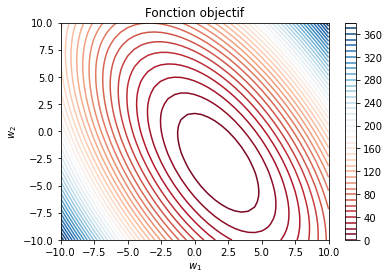

In [3]:
x = np.array([(1,1),(0,-1),(2,.5)])
y = np.array([-1,3,2])
def calc_perte_quadratique(w): return np.mean((x @ w - y) ** 2)

aidecours.show_2d_function(calc_perte_quadratique, -10, 10, .5)
plt.title('Fonction objectif')
plt.xlabel('$w_1$'); plt.ylabel('$w_2$'); CB()

### This is the Least Square method!

We know how to find the exact answer to the optimization problem.

By representing the observations $S$ in matrix form,

$$ 
\Xbf = \begin{bmatrix}
1 &  1\\
0 & -1\\
2 & \frac12
\end{bmatrix},
\quad\ybf = \begin{bmatrix}
-1\\
 3\\
 2
\end{bmatrix}
$$

We find that 

$\wbf^* = (\Xbf^T \Xbf)^{-1} \Xbf^\top \ybf \approx (1.76, -2.90)$

voir: <https://en.wikipedia.org/wiki/Least_squares>

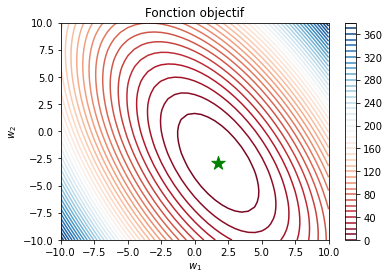

In [4]:
w_opt = np.linalg.inv(x.T @ x) @ x.T @ y


aidecours.show_2d_function(calc_perte_quadratique, -10, 10, .5)
plt.scatter(*w_opt, s=200, marker='*', c='g')
plt.title('Fonction objectif')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$'); CB()


## Classification: The sigmoidal Neuron

The combination of the linear output neuron and the quadratic loss is well suited for regression problems (where the labels are real values ($y\in\Rbb$). 

Now let us imagine that we want to solve a binary classification problem:
$$y\in\{0,1\}$$

Let's go back to our simplified neural network.

<p>
<center>
<img src="images/reseau_simple_.png"/>
</center>

We will consider that the output neuron applies the **sigmoidal function**, usually noted $\sigma$: 

$$f(x) = \sigma(x) = \frac{1}{1+e^{-x}}\,.$$

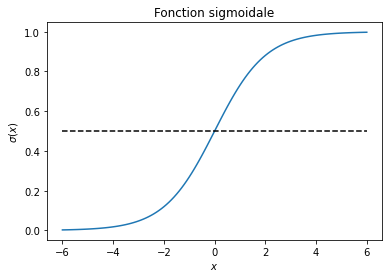

In [5]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
   
aidecours.show_1d_function(sigmoid, -6, 6, constante_x=.5); 
plt.title('Fonction sigmoidale'); plt.xlabel('$x$'); plt.ylabel('$\sigma(x)$'); CB()

The output of the neural network will therefore be between $0$ and $1$. 
We consider that the predicted label is $y=0$ when 

$$R_\wbf(\xbf) = \sigma(\wbf\cdot\xbf) < 0.5\,,$$
and $y=1$ otherwise.

An output close to $0.5$ is interpreted as a high uncertainty towards the result. Conversely, the closer the output is to $0$ or $1$, the more confident the network is about its decision.

A *bayesian* interpretation of the output of the sigmoidal neuron is to see it as the probability, according to the network $R_\wbf$, that $y=1$ for a certain observation $\xbf$:

$$P(y = 1|\,\xbf; \wbf) \ = \sigma(\wbf\cdot\xbf) \,.$$
Consequently:
$$P(y = 0\,|\,\xbf; \wbf)  \ = \ 1 - P(y = 1\,|\,\xbf; \wbf) \ =\ 1 - \sigma(\wbf\cdot\xbf) \,.$$

During the learning process, we wish to penalize the network as much as the probability attributed to the label of an observation is far from the true label. The loss function used in this context is called the **negative log likelihood** loss:
 
$$
L_{\rm nlv}\big(y', y\big) = - y \log(y') - (1-y)\log(1-y')
= 
\left\{
\begin{array}{lc}
-\log(1-y') & \mbox{si $y=0$,} \\
-\log(y')   & \mbox{si $y=1$.}
\end{array}
\right.
$$


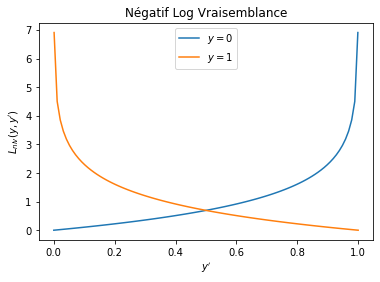

In [6]:
def perte_nlv_y0(y_prime):
    return - np.log(1. - y_prime) 
def perte_nlv_y1(y_prime):
    return - np.log(y_prime) 

aidecours.show_1d_function(perte_nlv_y0, 0, 0.999, .01, label='$y=0$');
aidecours.show_1d_function(perte_nlv_y1, 0.001, 1, .01, label='$y=1$');
plt.title('Négatif Log Vraisemblance'); plt.xlabel('$y\'$'); plt.ylabel('$L_{nlv}(y,y\')$'); CB()

####  Let's recap.

1. The output neuron applies the sigmoidal function to the sum of its inputs:

$$\sigma(\wbf\cdot\xbf) = \frac{1}{1+e^{-\wbf\cdot\xbf}}\,.$$

2. If $\sigma(\wbf\cdot\xbf) > 0.5$, we declare that $y=1$.

3. During the learning process, we penalize according to 
$$
\begin{array}{lcl}
L_{\rm nlv} \Big(\sigma(\wbf\cdot\xbf), y \Big) 
&=& - y \log(\sigma(\wbf\cdot\xbf)) - (1-y)\log(1-\sigma(\wbf\cdot\xbf)) \\
&=& \quad\vdots  \\
&=& - y \wbf\cdot\xbf + \log(1+e^{\wbf\cdot\xbf})
\end{array}
$$


La fonction objectif est alors:
$$
\min_\wbf \left[\frac1n \sum_{i=1}^n - y_i \wbf\cdot\xbf_i + \log(1+e^{\wbf\cdot\xbf_i})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

### Il s'agit de la régression logistique!

**À démontrer en exercice**

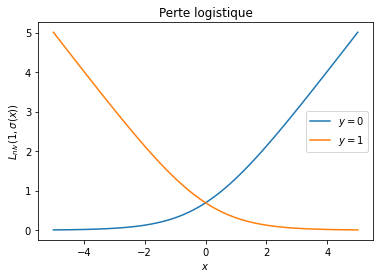

In [7]:
aidecours.show_1d_function(lambda a: perte_nlv_y0(sigmoid(a)), label='$y=0$');
aidecours.show_1d_function(lambda a: perte_nlv_y1(sigmoid(a)), label='$y=1$');
plt.title('Perte logistique'); plt.xlabel('$x$'); plt.ylabel('$L_{nlv}(1,\sigma(x))$'); CB()

### Example of classification

Below, we randomly generate a set of 100 observations in two dimensions using the function
sklearn.datasets.make_blobs` function 

(see: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

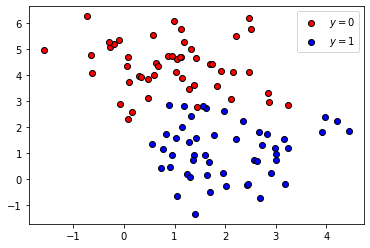

In [8]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=1, random_state=0)

aidecours.show_2d_dataset(x, y); CB()

Let's illustrate the function to optimize (with $\lambda=0.01$):
    
$$
\frac1n \sum_{i=1}^n - y_i \wbf\cdot\xbf_i + \log(1+e^{\wbf\cdot\xbf_i})+ \frac\lambda2\|\wbf\|^2\,.
$$ 

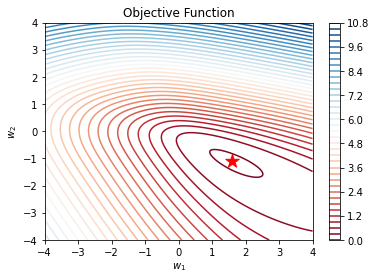

In [9]:
def calc_perte_logistique(w):
    pred = sigmoid(x @ w)
    pred[y==0] = 1-pred[y==0]
    return np.mean(-np.log(pred)) + .01*w @ w/2
    
aidecours.show_2d_function(calc_perte_logistique, -4, 4, .05)

w_opt =[ 1.59526315, -1.09703947]
plt.scatter(*w_opt, s=200, marker='*', c='r')
plt.title('Objective Function')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
CB()    

The optimum is in $\wbf^* \approx \vec{1.60\\ -1.10}\,$.

This corresponds to the following predictor

vector w : [ 1.90548808 -1.28002267]
Intercept b   : [0.]


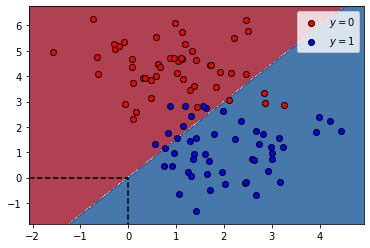

In [10]:
from sklearn.linear_model import LogisticRegression

algo = LogisticRegression(C=100., fit_intercept=False)
algo.fit(x, y)

coord=aidecours.show_2d_predictions(x, y, algo.predict)
plt.plot([coord[0],0,0], [0,0,coord[2]], '--k');
print('vector w :', algo.coef_[0])
print('Intercept b   :', algo.intercept_)
CB()

## Adding an intercept

To avoid restricting the prediction function to pass through the origin, we add an **intercept**


<center><img src="images/reseau_simple_biais.png" style="height: 200px;"/></center>

In the case of our simple neural network, the prediction function then becomes:

$$R_{\wbf,b}({\xbf}) = f\left(\sum_{i=1}^d w_i x_i + b\right) = f\big(\wbf\cdot \xbf+b\big).$$

Let's go back to our logistic regression example (i.e., the neural network where the output neuron $f$ is the **sigmoidal function** $\sigma$ and has loss function the **negative log likelihood** $L_{\rm nlv}$. The **intercept** optimization problem is expressed as follows:
$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\xbf_i+b) + \log(1+e^{\wbf\cdot\xbf_i+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

Vector w : [ 0.44183723 -2.48051367]
Intercept b   : 6.051860339763158


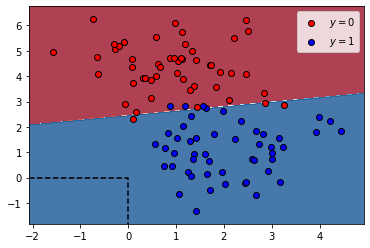

In [11]:
algo = LogisticRegression(C=100/len(y), fit_intercept=True)
algo.fit(x, y)
coord=aidecours.show_2d_predictions(x, y, algo.predict)

plt.plot([coord[0],0,0], [0,0,coord[2]], '--k')
print('Vector w :', algo.coef_[0])
print('Intercept b   :', algo.intercept_[0])
CB()

The optimum is found in $\wbf^* \approx \vec{0.97\\ -1.52}, b \approx 2.33\,$.

$\newcommand{\xbf}{{\bf x}}
\newcommand{\ybf}{{\bf y}}
\newcommand{\wbf}{{\bf w}}
\newcommand{\Ibf}{\mathbf{I}}
\newcommand{\Vbf}{\mathbf{V}}
\newcommand{\Xbf}{\mathbf{X}}
\newcommand{\Rbb}{\mathbb{R}}
\newcommand{\Phibf}{\pmb{\Phi}}
\newcommand{\vec}[1]{\left[\begin{array}{c}#1\end{array}\right]}
$

# Towards learning representations

************

## Limitations of linear predictors
The simple network studied so far can only generate **linear** predictors.

(of the form $\wbf\cdot\xbf + b$)

<p>
<center><img src="images/reseau_simple_biais.png"/></center>
</p>

As an example, consider this two-dimensional classification problem, generated with the function
`sklearn.datasets.make_circles` 

(see: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html)

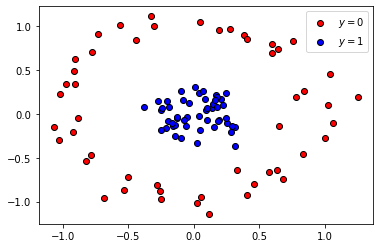

In [12]:
from sklearn.datasets import make_circles

x, y = make_circles(n_samples=100, noise=.1, factor=0.2, random_state=10)
aidecours.show_2d_dataset(x, y); CB()

Here is the result of the logistic regression

$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\xbf_i+b) + \log(1+e^{\wbf\cdot\xbf_i+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

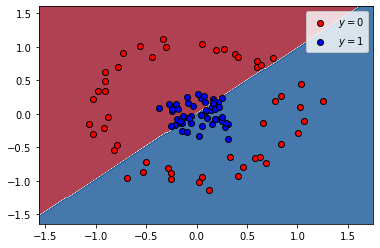

In [13]:
from sklearn.linear_model import LogisticRegression
algo = LogisticRegression()
algo.fit(x, y)
coord = aidecours.show_2d_predictions(x, y, algo.predict) 
CB()

Let's transform the data by applying a function $\Phibf:\Rbb^2\to \Rbb^4$:

$${\Phibf} : \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \, \mapsto \, \begin{bmatrix} x_1 \\ x_2 \\ x_1^2\\ x_2^2\end{bmatrix}$$

<center><img src="images/reseau_simple_phi.png"/></center>

Let us now apply logistic regression on the transformed set:

$$
\min_{\wbf,b} \left[\frac1n \sum_{i=1}^n - y_i (\wbf\cdot\Phibf(\xbf_i)+b) + \log(1+e^{\wbf\cdot\Phibf(\xbf_i)+b})+ \frac\lambda2\|\wbf\|^2\right].
$$ 

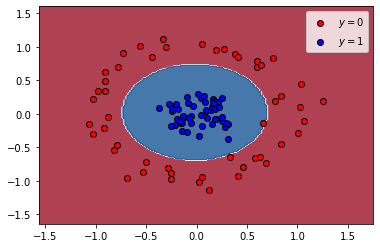

In [14]:
def phi(x):
    return np.hstack((x, x**2))

algo = LogisticRegression()
algo.fit(phi(x), y)

aidecours.show_2d_predictions(x, y, lambda a: algo.predict(phi(a))) 
CB()

Nowx, let's transform the data by applying function $\Phibf_2:\Rbb^2\to \Rbb^4$:

$${\Phibf}_2 : \begin{bmatrix}x_1 \\ x_2\end{bmatrix} \, \mapsto \, \begin{bmatrix} \exp{(-x_1^2)} \\ \exp{(-x_2^2)} \\ \tanh(x_1)\\ \tanh(x_2) \end{bmatrix}$$

and apply logistic regression on this transformed set.

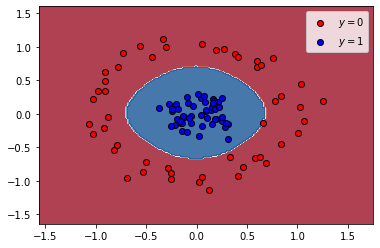

In [15]:
def phi2(x):
    return np.hstack((np.exp(-x**2), np.tanh(x)))

algo = LogisticRegression()
algo.fit(phi2(x), y)
aidecours.show_2d_predictions(x, y, lambda a: algo.predict(phi2(a))) 
CB()

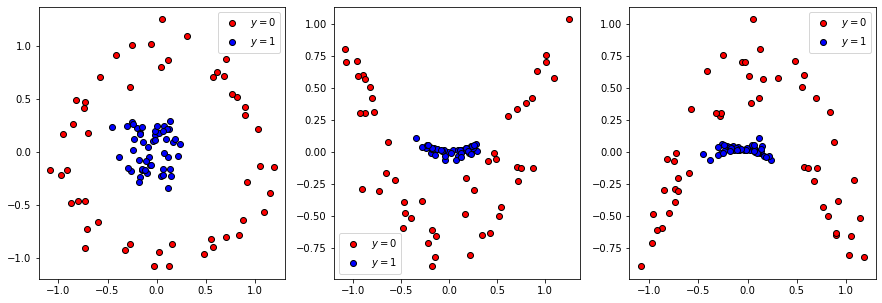

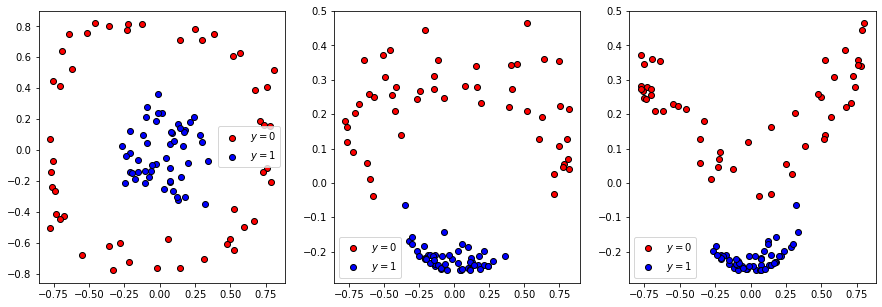

In [16]:
from sklearn.decomposition import PCA

proj = PCA(3)
xx = proj.fit_transform(phi(x))

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))
aidecours.show_2d_dataset(xx[:,[0,1]], y, ax1)
aidecours.show_2d_dataset(xx[:,[1,2]], y, ax2)
aidecours.show_2d_dataset(xx[:,[0,2]], y, ax3)



proj = PCA(3)
xx = proj.fit_transform(phi2(x))

fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(15,5))
aidecours.show_2d_dataset(xx[:,[0,1]], y, ax1)
aidecours.show_2d_dataset(xx[:,[1,2]], y, ax2)
aidecours.show_2d_dataset(xx[:,[0,2]], y, ax3)

CB()

## Hidden layer neural network

By adding a **hidden layer** to the neural network,
we allow it *to learn* the appropriate transformation function.

<p>
<center><img src="images/reseau_simple_2couches.png"/></center>
</p>

The network $R_{\Vbf,\wbf}(\xbf) = f\Big(\wbf, h\big(\xbf)\Big)$ above is parameterized by a matrix $\Vbf$ and a vector $\wbf$:

$$\xbf = \begin{bmatrix} {x_1\\x_2} \end{bmatrix} ; \quad
\Vbf=\begin{bmatrix} v_{11} & v_{12} \\
                     v_{21} & v_{22} \\ 
                     \vdots & \vdots \\
                     v_{D1} & v_{D2}
     \end{bmatrix}; \quad
\wbf = \begin{bmatrix} w_1 & w_2 & \cdots & w_D \end{bmatrix}
$$


## Activation function
We have already seen two choices for the *activation function* of the network output:
* The linear function: $f(a) = a$
* The sigmoidal function $f(a) = \sigma(a) = \dfrac{1}{1+e^{-a}}$

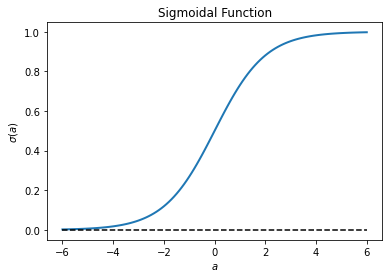

In [17]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))
   
aidecours.show_1d_function(sigmoid, -6, 6, constante_x=0, linewidth=2); 
plt.title('Sigmoidal Function'); plt.xlabel('$a$'); plt.ylabel('$\sigma(a)$'); CB()

## Activation Function

<center><img src="images/reseau_simple_2couches.png"/></center>

We will examine two possible choices of $h$ function for the hidden layer:
* The hyperbolic tangent (tanh)
* The *rectified linear unit* (ReLU)

## Hyperbolic tangent

Hyperbolic tangent function ($\tanh$) can be defined in term of the sigmoidal function
$$h(x) = \tanh(x) = 2\sigma\big(2x\big) - 1$$

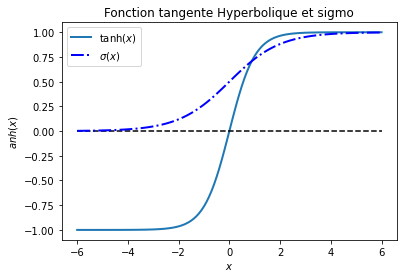

In [18]:
aidecours.show_1d_function(np.tanh, -6, 6, constante_x=0, linewidth=2, label='$\\tanh(x)$')
aidecours.show_1d_function(lambda x: sigmoid(x), -6, 6, c='b', linestyle='-.', linewidth=2, label='$\sigma(x)$')

plt.title('Fonction tangente Hyperbolique et sigmo')
plt.xlabel('$x$')
plt.ylabel('${\tanh}(x)$')
CB()

### Rectified Linear Unit (ReLU)
$$h(x) = \mathrm{relu}(x) = \max(0, x)$$

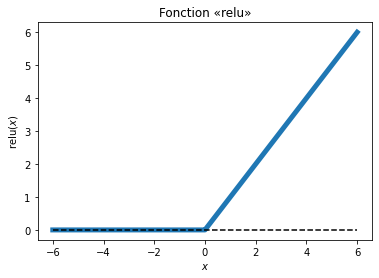

In [19]:
def relu(x):
    return np.maximum(0, x)
aidecours.show_1d_function(relu, -6, 6, constante_x=0, linewidth=5); 
plt.title('Fonction «relu»'); plt.xlabel('$x$'); plt.ylabel('$\mathrm{relu}(x)$'); CB()

## Some examples of neural network predictions

#### 4 neurons on the hidden layer, ReLU activation function

In [20]:
from sklearn.neural_network import MLPClassifier

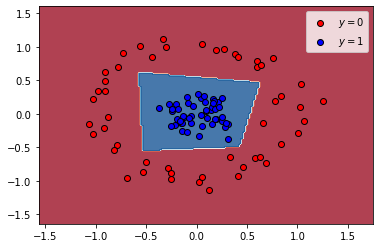

In [21]:
algo = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(4,), random_state=1)
algo.fit(x, y)

aidecours.show_2d_predictions(x, y, algo.predict); CB()

##### 10 neurons on the hidden layer, ReLU activation function

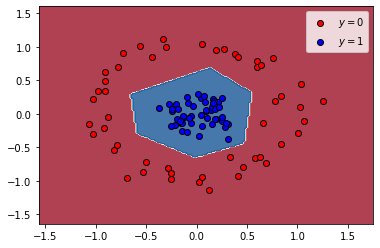

In [22]:
algo = MLPClassifier(activation='relu', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,), random_state=1)
algo.fit(x, y)

aidecours.show_2d_predictions(x, y, algo.predict); CB()

#### 10 neurons on the hidden layer, $\tanh$ activation function

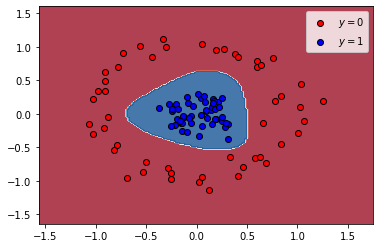

In [23]:
algo = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.01, hidden_layer_sizes=(10,), random_state=1)
algo.fit(x, y)

aidecours.show_2d_predictions(x, y, algo.predict); CB()